In [1]:
import numpy as np
import matplotlib.pyplot as plt

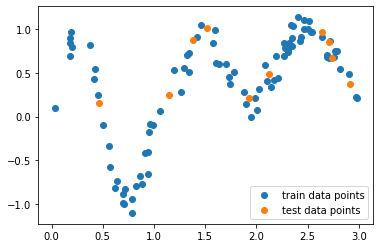

In [3]:
# Generating data for part (b)
x = np.random.rand(100)*3
e = np.random.normal(0,0.1,100)
x_train = x[:90]
x_test = x[90:]
x_train = np.sort(x_train)
x_test = np.sort(x_test)
t_train = np.empty(x_train.shape)
t_test = np.empty(x_test.shape)
for i in range (0,x_train.shape[0]):
    if(x_train[i]<1):
        t_train[i] = np.sin(2*np.pi*x_train[i]) + e[i]
    elif(x_train[i]<1.5 and x_train[i]>=1):
        t_train[i] = 2*x_train[i]-2 + e[i]
    elif(x_train[i]<2 and x_train[i]>=1.5):
        t_train[i] = -2*x_train[i]+4 + e[i]
    elif(x_train[i]<=3 and x_train[i]>=2):
        t_train[i] = np.exp((-(x_train[i]-2.5)**2)*2*np.pi) + e[i]
for i in range (0,x_test.shape[0]):
    if(x_test[i]<1):
        t_test[i] = np.sin(2*np.pi*x_test[i]) + e[90+i]
    elif(x_test[i]<1.5 and x_test[i]>=1):
        t_test[i] = 2*x_test[i]-2 + e[90+i]
    elif(x_test[i]<2 and x_test[i]>=1.5):
        t_test[i] = -2*x_test[i]+4 + e[90+i]
    elif(x_test[i]<=3 and x_test[i]>=2):
        t_test[i] = np.exp((-(x_test[i]-2.5)**2)*2*np.pi) + e[90+i]
plt.scatter(x_train,t_train,label = 'train data points')
plt.scatter(x_test,t_test,label = 'test data points')
plt.legend()
plt.show()

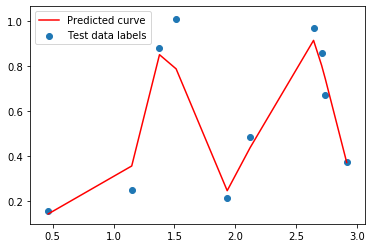

In [4]:
# Fitting using polynomial kernel
# Training
M = 10 # Degree of the polynomial kernel
deg = M+1
phi1 = np.empty([x_train.shape[0],deg])
for i in range(0,phi1.shape[0]):
    for j in range(0,phi1.shape[1]):
        phi1[i,j] = x_train[i]**j*1.0
w1 = np.matmul(np.linalg.inv(np.matmul(phi1.T,phi1)),np.matmul(phi1.T,t_train))
# Testing
y1 = np.zeros(t_test.shape)
for i in range(0,x_test.shape[0]):
    for j in range(0,w1.shape[0]):
        y1[i]+=w1[j]*x_test[i]**j
plt.plot(x_test,y1,label = 'Predicted curve', color = 'red')
plt.scatter(x_test, t_test, label = 'Test data labels')
plt.legend()
plt.show()

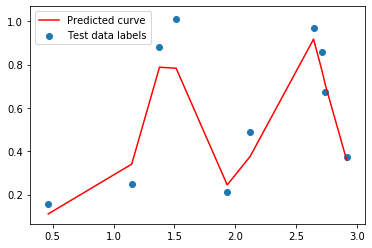

In [5]:
# Fitting using gaussian kernel
# Training
nos = 10 # Dimension of the kernel
mu1 = np.linspace(0,3,nos) # Array of means to be used in guassian kernel
sigma1 = 0.5 # Value of sigma in gaussian kernel
phi2 = np.empty([x_train.shape[0],nos])
for i in range(0,phi2.shape[0]):
    for j in range(0,phi2.shape[1]):
        phi2[i,j] = np.exp(-((x_train[i]-mu1[j])**2)/(2*sigma1**2))
w2 = np.matmul(np.linalg.inv(np.matmul(phi2.T,phi2)),np.matmul(phi2.T,t_train))
# Testing
y2 = np.zeros(t_test.shape)
for i in range(0,x_test.shape[0]):
    for j in range(0,w2.shape[0]):
        y2[i]+=w2[j]*np.exp(-((x_test[i]-mu1[j])**2)/(2*sigma1**2))
plt.plot(x_test,y2,label = 'Predicted curve', color = 'red')
plt.scatter(x_test, t_test, label = 'Test data labels')
plt.legend()
plt.show()

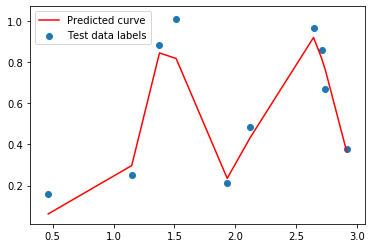

In [6]:
# Fitting using sigmoidal kernel
def sigmoid(x):
    return 1.0/(1+np.exp(x))
# Training
nos = 10 # Dimension of the kernel
mu2 = np.linspace(0,3,nos) # Array of means to be used in sigmoidal kernel
sigma2 = 0.5 # Value of sigma in gaussian kernel
phi3 = np.empty([x_train.shape[0],nos])
for i in range(0,phi2.shape[0]):
    for j in range(0,phi3.shape[1]):
        phi3[i,j] = sigmoid((x_train[i]-mu2[j])/sigma2)
w3 = np.matmul(np.linalg.inv(np.matmul(phi3.T,phi3)),np.matmul(phi3.T,t_train))
# Testing
y3 = np.zeros(t_test.shape)
for i in range(0,x_test.shape[0]):
    for j in range(0,w3.shape[0]):
        y3[i]+=w3[j]*sigmoid((x_test[i]-mu2[j])/sigma2)
plt.plot(x_test,y3,label = 'Predicted curve', color = 'red')
plt.scatter(x_test, t_test, label = 'Test data labels')
plt.legend()
plt.show()